# ●	TASK 2.1 (Visualization using Python)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_csv("user_demographics.csv")

In [3]:
data2=pd.read_csv("User_product_purchase_details_p2.csv")

In [4]:
data=pd.merge(data1,data2,on='User_ID',how='right')
data.head(5)

,User_ID,Gender,Age,Occupation,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,P00285442,C,4+,0,8,NaN,NaN,7969


In [5]:
data.fillna(0)

,User_ID,Gender,Age,Occupation,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,0.0,0.0,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,0.0,0.0,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,0.0,1057
4,1000002,M,55+,16,P00285442,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,P00372445,B,1,1,20,0.0,0.0,368
550064,1006035,F,26-35,1,P00375436,C,3,0,20,0.0,0.0,371
550065,1006036,F,26-35,15,P00375436,B,4+,1,20,0.0,0.0,137
550066,1006038,F,55+,1,P00375436,C,2,0,20,0.0,0.0,365


### Maximum, spend in different categories of products

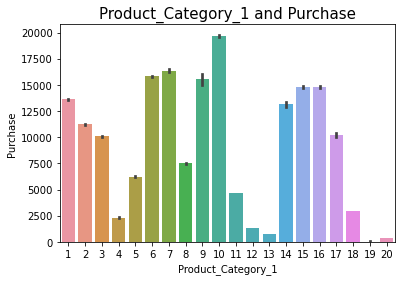

In [6]:
sns.barplot(x="Product_Category_1", y="Purchase", data=data)
plt.title('Product_Category_1 and Purchase', fontsize=15);

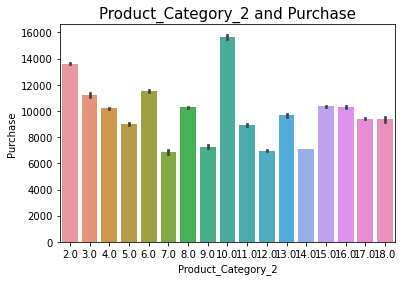

In [7]:
sns.barplot(x="Product_Category_2", y="Purchase", data=data)
plt.title('Product_Category_2 and Purchase', fontsize=15);

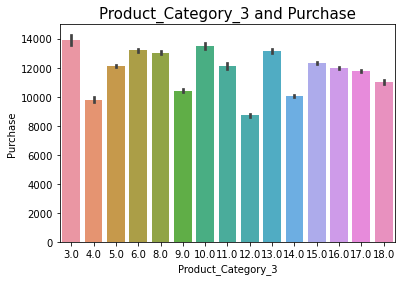

In [8]:
sns.barplot(x="Product_Category_3", y="Purchase", data=data)
plt.title('Product_Category_3 and Purchase', fontsize=15);

### Based on above data which set of customers can be offered personalised discount vouchers

#### Gender and Age

<AxesSubplot:title={'center':'Gender'}, ylabel='Gender'>

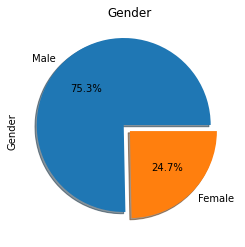

In [9]:
data["Gender"].value_counts().plot.pie(title="Gender", explode=(0.1, 0), labels=["Male", "Female"], autopct="%1.1f%%", shadow=True)

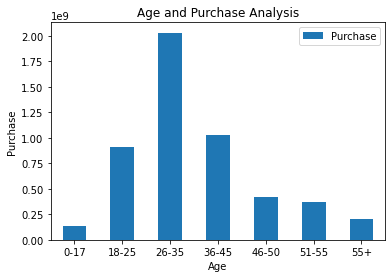

In [10]:
age_purchase = data.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)

age_purchase.plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Mean purchase of different gender')

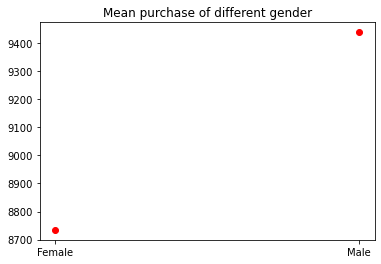

In [11]:
x = data.groupby(["Gender"]).mean()[["Purchase"]].index
y = data.groupby(["Gender"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.xticks(x, ["Female", "Male"])
plt.title("Mean purchase of different gender")

From the age and gender figures, we can see several interesting things. First of all, the main customers for black friday sale are male(over 75 percent), especially those of age 26-35, who account for almost one third of male cuntomers of all ages.  In spite of gender, people between age of 18 and 45 have made more black friday sales.

#### City

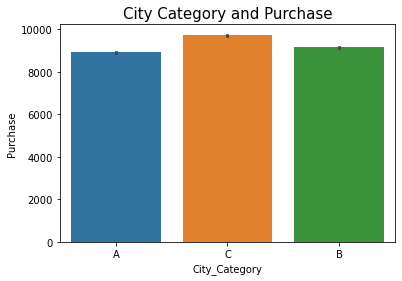

In [12]:
sns.barplot(x="City_Category", y ='Purchase', data=data)
plt.title('City Category and Purchase', fontsize=15);


<AxesSubplot:title={'center':'City_Category'}, ylabel='Purchase'>

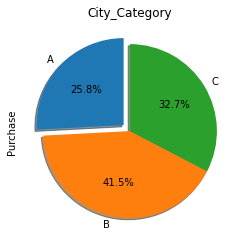

In [13]:
data.groupby("City_Category")["Purchase"].sum().plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

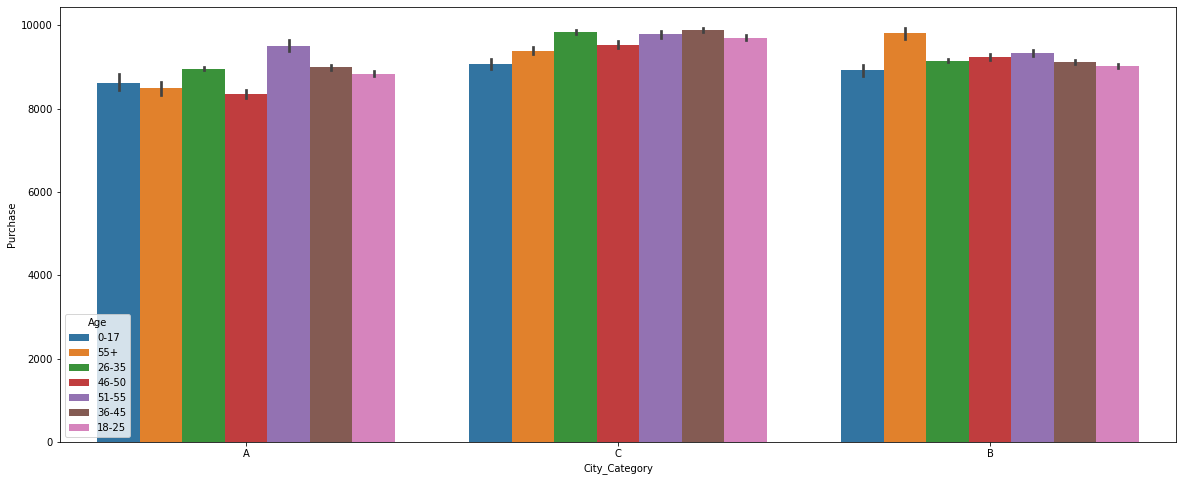

In [14]:
plt.figure(figsize = (20,8))
sns.barplot(x='City_Category', y='Purchase',hue = 'Age',data = data)

In CITY_A more money spent by 51-55 age grooup

In CITY_B more money spent by 55+ age group

In CITY_C more money spent by all age groups are similar but overall more money spent by city_C.

<Figure size 720x720 with 0 Axes>

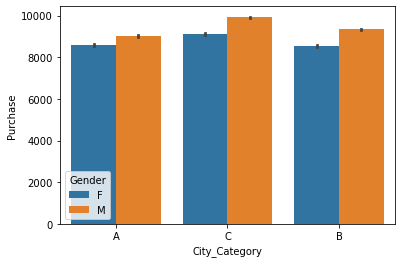

<Figure size 720x720 with 0 Axes>

In [15]:
sns.barplot(x='City_Category',y='Purchase',hue='Gender',data = data)
plt.figure(figsize = (10,10))

Eventhough we have more no of people participated in sale by CITY_B but more money spent by CITY_C people.Male spent slightly more than female

#### Occupation

<AxesSubplot:title={'center':'Occupation'}>

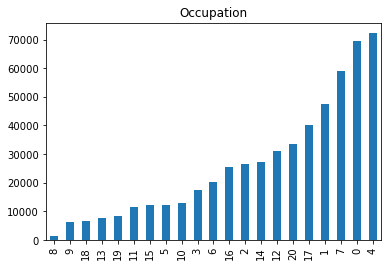

In [16]:
data["Occupation"].value_counts().sort_values().plot.bar(title="Occupation")

<AxesSubplot:title={'center':'Mean purchase of different occupation'}, xlabel='Occupation'>

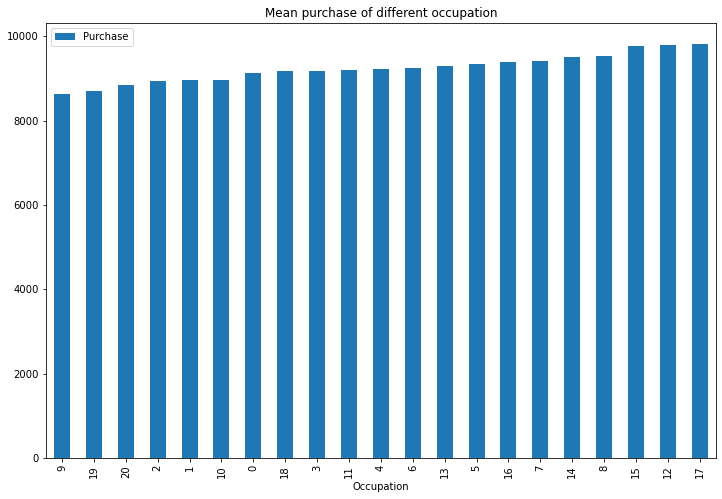

In [17]:
data.groupby(["Occupation"]).mean()[["Purchase"]].sort_values(by="Purchase").plot.bar(title="Mean purchase of different occupation", figsize=(12, 8))


From occupation figure  the bars show a steep cliff. Ocupation 4, 0, 7, 1, 17, 20 are the most common ones and they exceed other occupations by a great margin, which means people having this six occupations should definately be our main marketing target. 

The second figure above shows something very different. There is a cluster in how much they spent, most people spent around 600K to 800K in the store. People with occupation 18, 19 typically spent more than others in the store on Black Friday. As a matter of fact, occupation 18 and 19 were next to the least common occupation for customers. Therefore we should make different marketing stratgies for  biggest target and biggest spender.

#### Stay in City

Text(0.5, 1.0, 'Stay_In_Current_City_Years and Purchase')

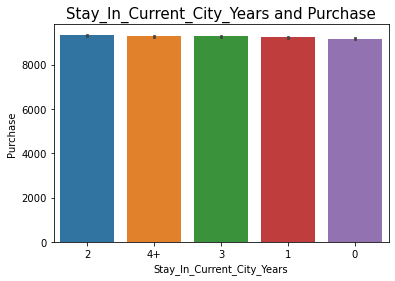

In [18]:
sns.barplot(x='Stay_In_Current_City_Years', y ='Purchase', data=data)
plt.title('Stay_In_Current_City_Years and Purchase', fontsize=15)

<AxesSubplot:title={'center':'Years of staying in the city'}, ylabel='Stay_In_Current_City_Years'>

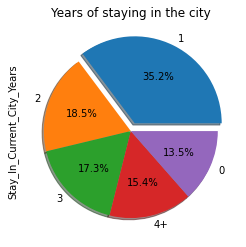

In [19]:
data["Stay_In_Current_City_Years"].value_counts().plot.pie(title="Years of staying in the city", explode=(0.1, 0, 0, 0, 0), autopct="%1.1f%%", shadow=True)

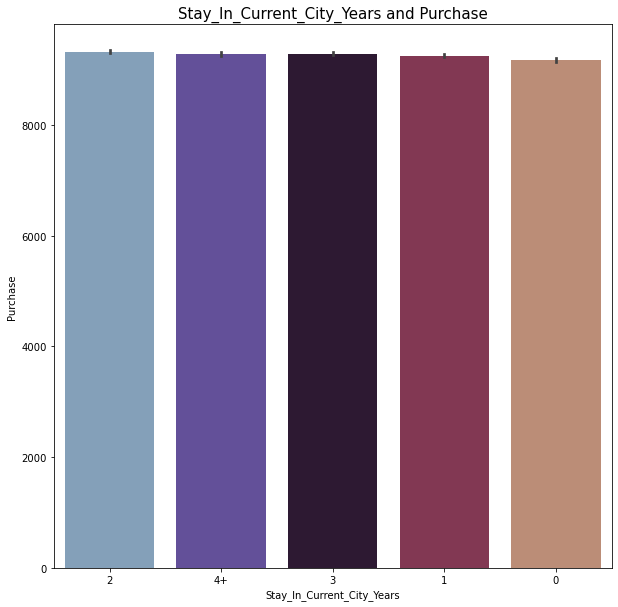

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x="Stay_In_Current_City_Years", y ='Purchase', data=data, palette='twilight')
plt.title('Stay_In_Current_City_Years and Purchase', fontsize=15);

#### Product categories

<AxesSubplot:title={'center':'Gender&Product'}, xlabel='Occupation'>

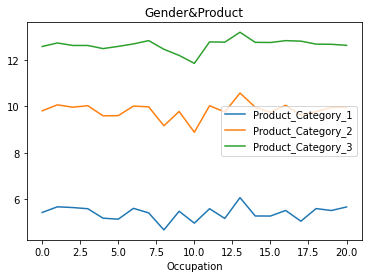

In [21]:
data.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.line(title="Gender&Product")

In [34]:
data["Product_Category_1"].count()

550068

In [25]:
data["Product_Category_2"].count()

376430

In [26]:
data["Product_Category_3"].count()

166821

#### the most selled product category is "Product_Category_1"

# CONCLUSION

* From the age and gender figures, we can see several interesting things. First of all, the main customers for black friday sale are male(over 75 percent), especially those of age 26-35, who account for almost one third of male cuntomers of all ages. In spite of gender, people between age of 18 and 45 have made more black friday sales.

* Eventhough we have more no of people participated in sale by CITY_B but more money spent by CITY_C people.Male spent slightly more than female.

* From occupation figure the bars show a steep cliff. Occupation 4, 0, 7, 1, 17, 20 are the most common ones and they exceed other occupations by a great margin, which means people having this six occupations should definately be our main marketing target. Therefore we should make different marketing stratgies for biggest target and biggest spender.

so from above points the company can offer offered personalised discount vouchers to the customers whoose age is in between 18 and 45 and the company should makes different stratgies for biggest target and biggest spender whoose occupations are 4,0,7,1,17,20

product category 1 selled more when compared to other categories and we can clearly observe the users are not showing intrest to buy the products under category 3 .so the company can boost up the sales by providing the discount the on products which are least purchased by coustomers by this the company can attract the customers towards that product.so the company can provide the discount either on product category 2 or 3

## lets go beyond the task

the company can figure out the top 10 customers and can provide discount based on their total purchase amount

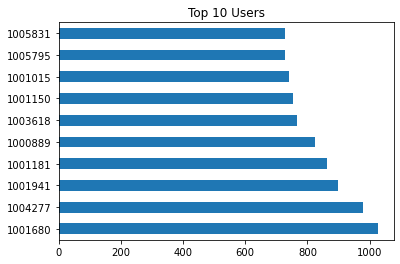

In [38]:
data.User_ID.value_counts().head(10).plot(kind='barh',title = 'Top 10 Users');

lets know about the top sold product id and which age people purchased that product most.

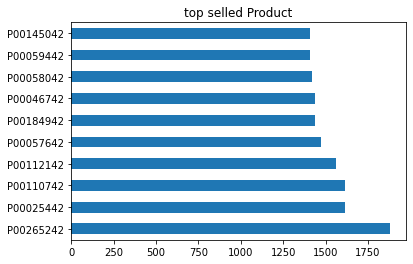

In [39]:
data.Product_ID.value_counts().head(10).plot(kind='barh',title = 'top selled Product');

top selled product is the product_id with P00265242

In [43]:
best_selled = data[data.Product_ID == 'P00265242']

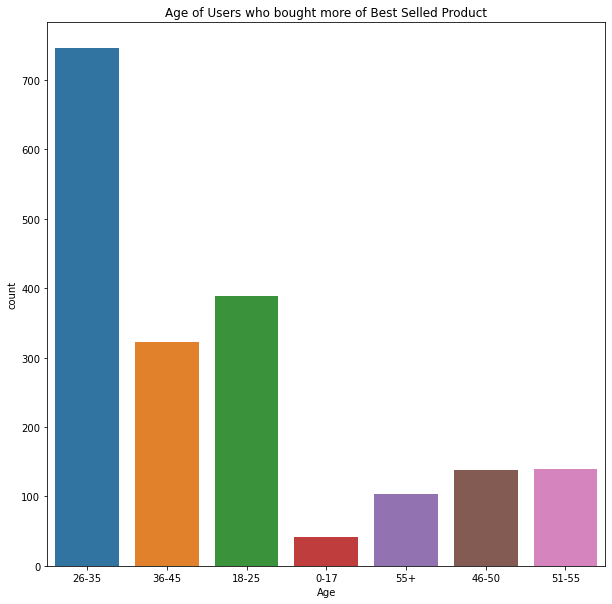

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(x="Age",data=best_selled)
plt.title('Age of Users who bought more of Best Selled Product');


26-35 group Age of Users  bought more of Best Selled Product